In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import kagglehub as kg


In [93]:
data = pd.read_csv(r"C:\Users\ASUS\Desktop\Data Sets\Student_Performance.csv")

In [ ]:
# Yes Ve No deyerlerimizi 1 ve 0 ra ceviririk
data["Extracurricular Activities"] = data["Extracurricular Activities"].replace(
    {"Yes": 1, "No": 0}
)
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [95]:
X = data[
    [
        "Hours Studied",
        "Previous Scores",
        "Extracurricular Activities",
        "Sleep Hours",
        "Sample Question Papers Practiced"
    ]
]
y = data['Performance Index']

In [96]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
scaler  = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [108]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19820\2229006287.py:12: UserWarning: You passed a edgecolor/edgecolors ('ü') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


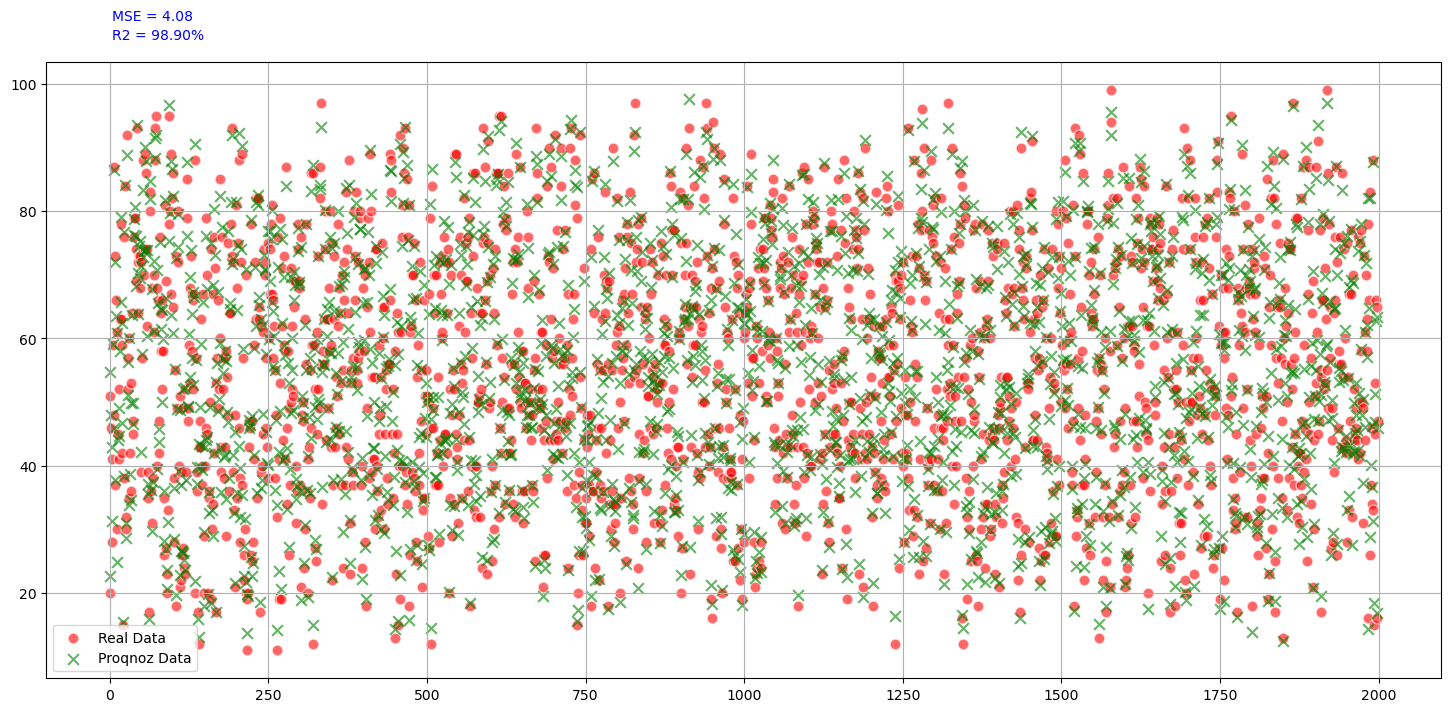

In [113]:
plt.figure(figsize=(18,8))
plt.scatter(
    range(len(y_test)),
    y_test,
    marker="o",
    color="r",
    label="Real Data",
    alpha=0.6,
    edgecolors="w",
    s=60,
)
plt.scatter(
    range(len(y_pred)),
    y_pred,
    marker="x",
    color="g",
    label="Proqnoz Data",
    alpha=0.6,
    edgecolors="ü",
    s=60,
)
plt.text(4,110,f"MSE = {mse:.2f}", color='b')
plt.text(4,107,f"R2 = {r2 *100:.2f}%", color='b')
plt.legend()
plt.grid()